In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [2]:
burglaries = pd.read_csv('../data/burg_agg.csv')

burglaries.head()

,Unnamed: 0,TRACTCE,count_of_burglaries,STATEFP,COUNTYFP,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,zip_code,population,median_income,burglaries_per_1000
0,426,16300,50,47,37,47037016300,163.0,Census Tract 163,G5020,S,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",NaN,2560,50710,19.53125
1,427,16300,50,47,37,47037016300,163.0,Census Tract 163,G5020,S,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",NaN,2560,50710,19.53125
2,428,16300,50,47,37,47037016300,163.0,Census Tract 163,G5020,S,...,RELIGIOUS,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",NaN,2560,50710,19.53125
3,429,16300,50,47,37,47037016300,163.0,Census Tract 163,G5020,S,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",NaN,2560,50710,19.53125
4,430,16300,50,47,37,47037016300,163.0,Census Tract 163,G5020,S,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.79, 36.15]}",NaN,2560,50710,19.53125


In [3]:
burglaries = (burglaries
              .drop(columns = ['Unnamed: 0',
                     'NAME',
                     'MTFCC',
                     'FUNCSTAT','index_right',
                     'primary_key', 
                     'incident_number',
                     'report_type',
                     'report_type_description', 
                     'incident_status_code',
                     'incident_status_description', 
                     'investigation_status',
                     'incident_occurred',
                     'incident_reported', 
                     'incident_location',
                     'rpa',
                     'zone', 'location_code',
                     'location_description',
                     'offense_number', 'offense_nibrs',
                     'offense_description',
                     'weapon_primary', 'weapon_description',
                     'victim_number',
                     'domestic_related', 'victim_type',
                     'victim_description',
                     'victim_gender',
                     'victim_race', 'victim_ethnicity',
                     'victim_county_resident',
                     'mapped_location',
                     'zip_code'])
             .rename(columns = {
                 'TRACTCE': 'tract',
                 'NAMELSAD': 'tract_name'
             })
             .drop_duplicates('tract'))

In [4]:
burglaries.head()

,tract,count_of_burglaries,STATEFP,COUNTYFP,GEOID,tract_name,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,latitude,longitude,population,median_income,burglaries_per_1000
0,16300,50,47,37,47037016300,Census Tract 163,1099214,0,36.143191,-86.789913,"POLYGON ((-86.794264 36.137498, -86.7936419999...",36.150,-86.79,2560,50710,19.531250
50,16200,21,47,37,47037016200,Census Tract 162,1834986,8826,36.138478,-86.780981,"POLYGON ((-86.788978 36.135139, -86.788962 36....",36.135,-86.78,3074,27174,6.831490
71,11001,20,47,37,47037011001,Census Tract 110.01,7602541,13081,36.222728,-86.753593,"POLYGON ((-86.77646299999999 36.206646, -86.77...",36.210,-86.76,6746,43107,2.964720
91,19500,19,47,37,47037019500,Census Tract 195,4890994,182715,36.157243,-86.781464,"POLYGON ((-86.80271999999999 36.152479, -86.80...",36.150,-86.78,7956,75446,2.388135
110,14800,18,47,37,47037014800,Census Tract 148,759493,0,36.151097,-86.759708,"POLYGON ((-86.769481 36.151216, -86.768542 36....",36.150,-86.76,3310,15730,5.438066


In [5]:
burglaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 805
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tract                144 non-null    int64  
 1   count_of_burglaries  144 non-null    int64  
 2   STATEFP              144 non-null    int64  
 3   COUNTYFP             144 non-null    int64  
 4   GEOID                144 non-null    int64  
 5   tract_name           144 non-null    object 
 6   ALAND                144 non-null    int64  
 7   AWATER               144 non-null    int64  
 8   INTPTLAT             144 non-null    float64
 9   INTPTLON             144 non-null    float64
 10  geometry             144 non-null    object 
 11  latitude             144 non-null    float64
 12  longitude            144 non-null    float64
 13  population           144 non-null    int64  
 14  median_income        144 non-null    int64  
 15  burglaries_per_1000  144 non-null    flo

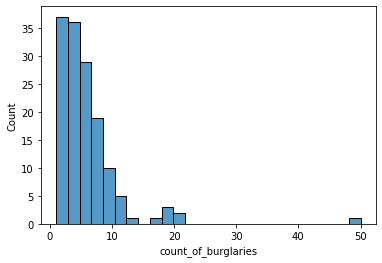

In [6]:
sns.histplot(burglaries,
            x = 'count_of_burglaries');

In [27]:
base_model = (sm.GLM(endog = burglaries['burglaries_per_1000'],
                         exog = sm.add_constant(burglaries[[]]),
                         family = sm.families.Poisson(),
                         offset = np.log(burglaries['population']))
                  .fit()
                 )
base_model.summary()

C:\Users\sarei\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     burglaries_per_1000   No. Observations:                  144
Model:                             GLM   Df Residuals:                      143
Model Family:                  Poisson   Df Model:                            0
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -300.14
Date:                 Mon, 11 Oct 2021   Deviance:                       305.44
Time:                         19:17:47   Pearson chi2:                     856.
No. Iterations:                      5                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0112      0.068   -117.009      0.000      -8.145      -7.877
==============================================================================
"""

In [14]:
poisson_model= (sm.GLM(endog = burglaries['burglaries_per_1000'],
                         exog = sm.add_constant(burglaries[['median_income']]),
                         family = sm.families.Poisson(),
                         offset = np.log(burglaries['population']))
                  .fit()
                 )

poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     burglaries_per_1000   No. Observations:                  144
Model:                             GLM   Df Residuals:                      142
Model Family:                  Poisson   Df Model:                            1
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -271.75
Date:                 Mon, 11 Oct 2021   Deviance:                       248.65
Time:                         19:11:35   Pearson chi2:                     637.
No. Iterations:                      5                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.5944      0.199    -33.078      0.000      -6.985      -6.204
median_income -2.456e-05   3.58e-06     -6.856      0.000   -3.16e-05   -1.75e-05
=================================================================================
"""

In [33]:
neg_binom_model = glm(formula = 'burglaries_per_1000 ~ median_income', 
                      data = burglaries,
                      exposure = burglaries['population'],
                      family = sm.families.NegativeBinomial()
                     ).fit()

neg_binom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     burglaries_per_1000   No. Observations:                  144
Model:                             GLM   Df Residuals:                      142
Model Family:         NegativeBinomial   Df Model:                            1
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -254.39
Date:                 Mon, 11 Oct 2021   Deviance:                       90.821
Time:                         19:22:29   Pearson chi2:                     261.
No. Iterations:                      7                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.5937      0.305    -21.636      0.000      -7.191      -5.996
median_income -2.125e-05   4.95e-06     -4.295      0.000    -3.1e-05   -1.16e-05
=================================================================================
"""

In [34]:
base_model.aic

602.2890939853403

In [35]:
poisson_model.aic

547.5037801155241

In [36]:
neg_binom_model.aic

512.7842320572049